In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


In [3]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fall25_ISE_Mathematics/Project_Datasets/StudentPerformanceFactors.csv')

In [4]:
dataset1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
dataset1.shape

(6607, 20)

In [6]:
dataset1.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [7]:
dataset1.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
dataset1[dataset1.isnull().any(axis=1) > 0]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


# ***Missing Values***

In [9]:
missing_data_count = dataset1.isnull().sum()
print(missing_data_count)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [10]:
missing_data_percent=dataset1.isnull().sum()*100/len(dataset1)
print(missing_data_percent)


Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


In [11]:
missing_data=pd.DataFrame({'count-missing': missing_data_count, 'percentage': missing_data_percent})
print(missing_data)



                            count-missing  percentage
Hours_Studied                           0    0.000000
Attendance                              0    0.000000
Parental_Involvement                    0    0.000000
Access_to_Resources                     0    0.000000
Extracurricular_Activities              0    0.000000
Sleep_Hours                             0    0.000000
Previous_Scores                         0    0.000000
Motivation_Level                        0    0.000000
Internet_Access                         0    0.000000
Tutoring_Sessions                       0    0.000000
Family_Income                           0    0.000000
Teacher_Quality                        78    1.180566
School_Type                             0    0.000000
Peer_Influence                          0    0.000000
Physical_Activity                       0    0.000000
Learning_Disabilities                   0    0.000000
Parental_Education_Level               90    1.362192
Distance_from_Home          

In [12]:
print(missing_data[missing_data['count-missing']>0])

                          count-missing  percentage
Teacher_Quality                      78    1.180566
Parental_Education_Level             90    1.362192
Distance_from_Home                   67    1.014076


# ***Handling Missing Values***

In [13]:
#dataset1['Teacher_Quality'].fillna(dataset1['Teacher_Quality'].mode()[0], inplace=True)
missing_data_col=missing_data[missing_data['count-missing']>0].index
print(missing_data_col)
for each in missing_data_col:
  dataset1.fillna({each: dataset1[each].mode()[0]},inplace=True)


dataset1.isnull().sum()


Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# ***Boxplots for Numerical data***

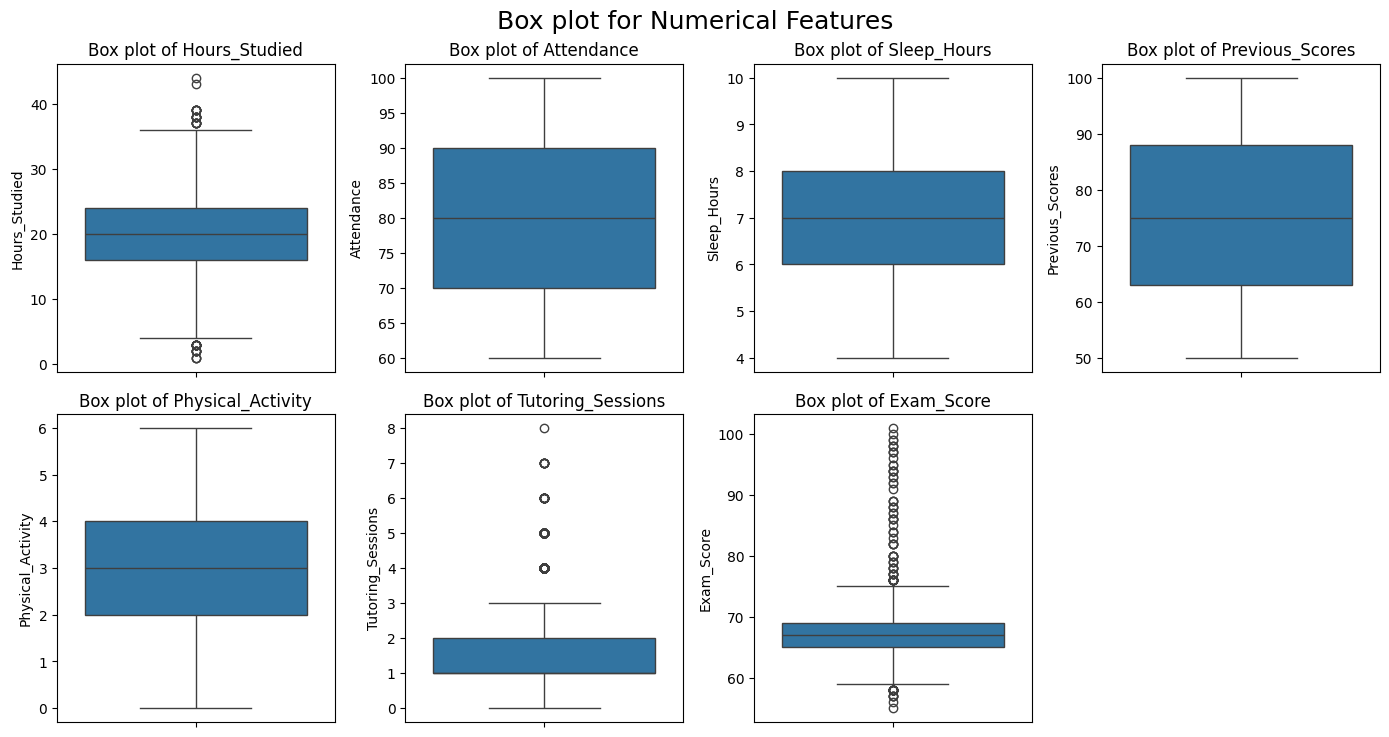

In [14]:
numerical_cols = ["Hours_Studied", "Attendance", "Sleep_Hours",
                  "Previous_Scores", "Physical_Activity", "Tutoring_Sessions", "Exam_Score"]

plt.figure(figsize=(14, 11))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(dataset1[col])
    plt.xticks(rotation=30)
    plt.title(f"Box plot of {col}")
plt.suptitle("Box plot for Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()

# ***Handling Outliers***

In [15]:
print(f'Count of outliers for Tutoring_Sessions: {len(dataset1[dataset1['Tutoring_Sessions'] >= 3])}')


Count of outliers for Tutoring_Sessions: 1266


In [16]:
print(f'Count of outliers for Exam_Score : {len(dataset1[dataset1['Exam_Score'] > 100])}')
dataset1[dataset1['Exam_Score'] > 100]
dataset1.loc[dataset1["Exam_Score"] > 100, "Exam_Score"] = 100

Count of outliers for Exam_Score : 1




1.   For Columns Exam_score , 1 student has score greater than 100. Since , it is 101, it looks like it is a typing mistake and has been corrected to 100.
2.   For Tutoring session 1266 students are shown as outliers in the box plot.
These many students can't be outliers. Some students may require more hours of tutoring session , so it does not need to be handled.
3. For Hours Studied , Some students may study for longer hours , which is perfectly fine. It does not look like the dataset is wrong or needs correction.






# ***Histogram for numerical Columns***

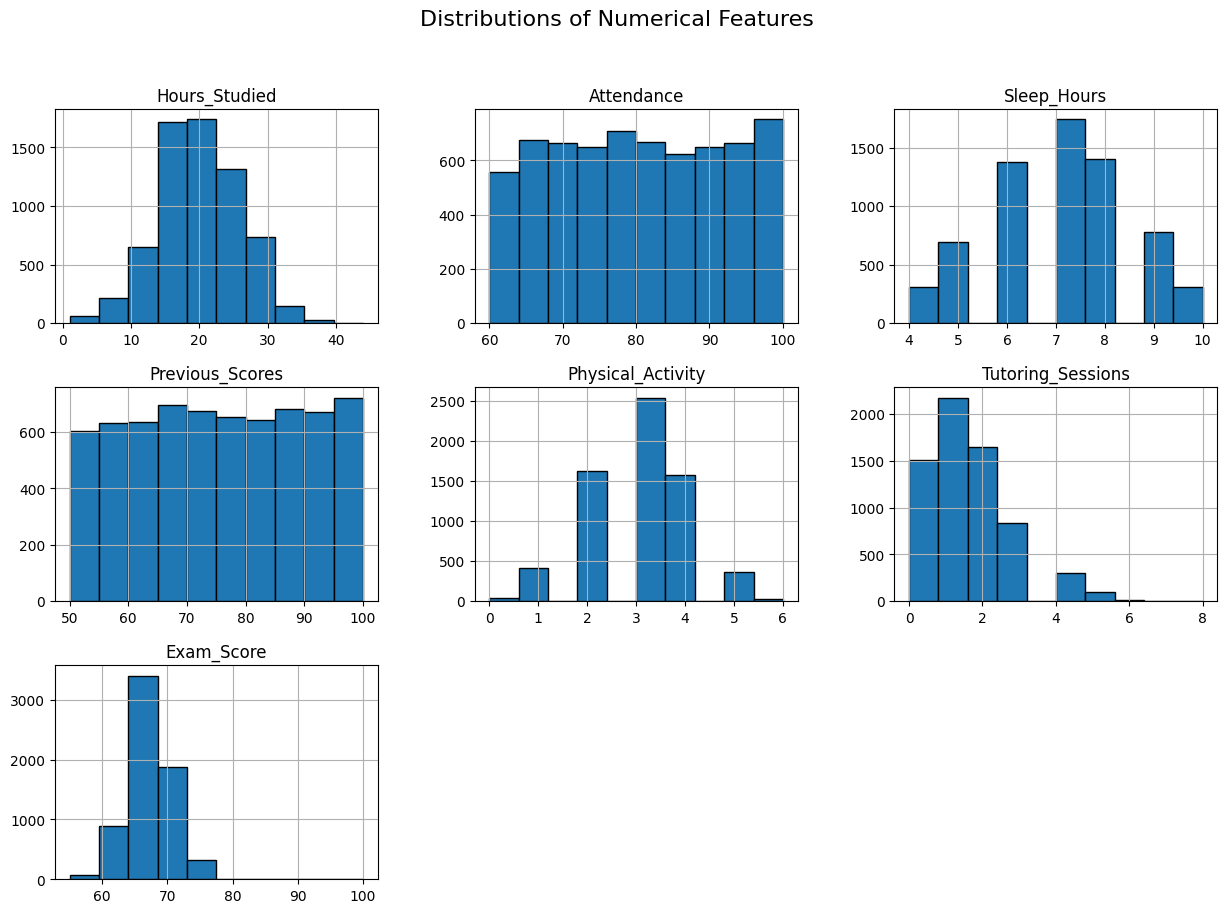

In [17]:
dataset1[numerical_cols].hist(figsize=(15, 10), bins=10, edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

# ***Count Plot for Categorical Data***

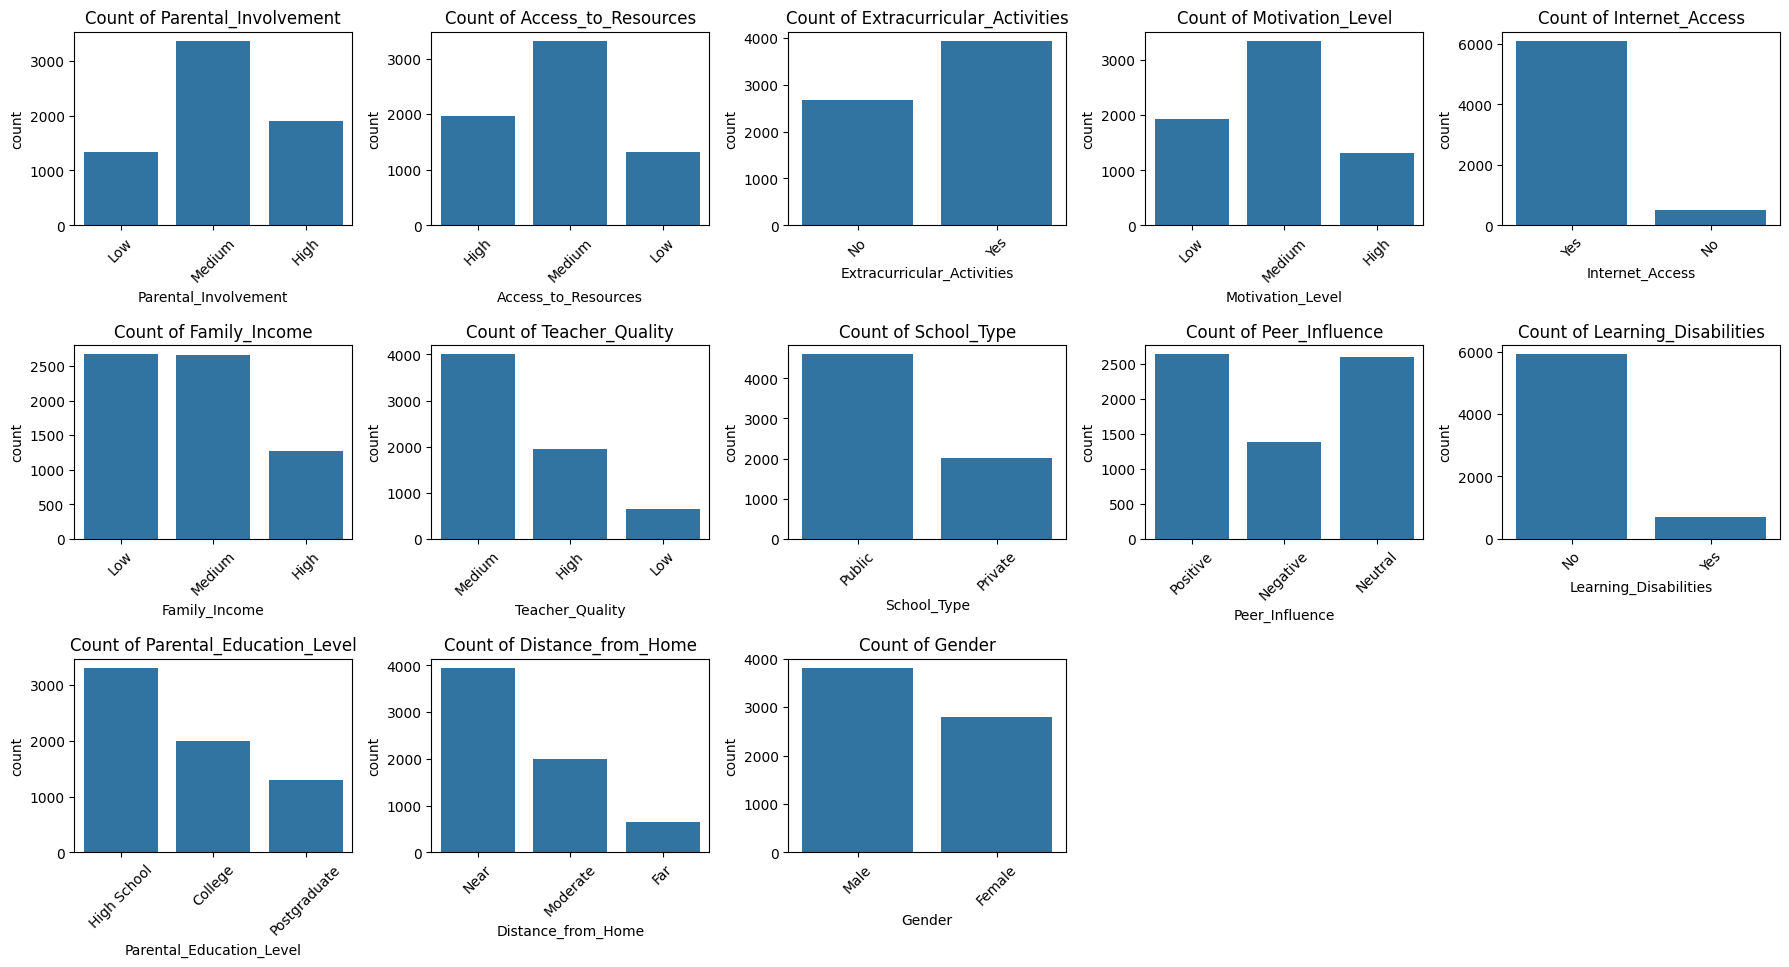

In [18]:
#### Distribution chart for categorical data
cat_cols = ["Parental_Involvement","Access_to_Resources","Extracurricular_Activities",
            "Motivation_Level","Internet_Access","Family_Income","Teacher_Quality",
            "School_Type","Peer_Influence","Learning_Disabilities",
            "Parental_Education_Level","Distance_from_Home","Gender"]

plt.figure(figsize=(18,15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 5, i)   # 5 rows, 3 columns grid (total 15 slots for 13 plots)
    sns.countplot(x=col, data=dataset1)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
dataset1["activity_sleep_ratio"] = dataset1["Physical_Activity"] / dataset1["Sleep_Hours"]

<Axes: xlabel='activity_sleep_ratio', ylabel='Exam_Score'>

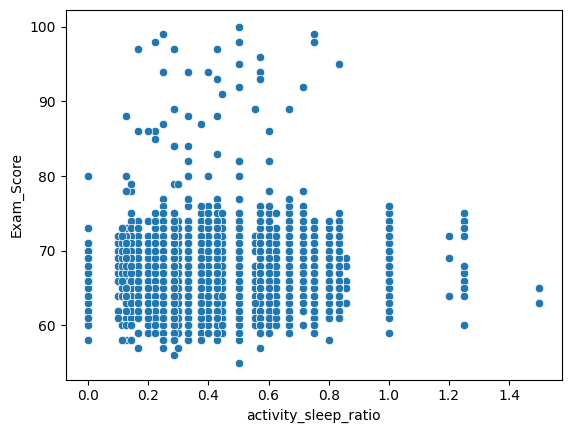

In [21]:
sns.scatterplot(x="activity_sleep_ratio", y="Exam_Score", data=dataset1)

In [32]:
dataset1[["activity_sleep_ratio","Exam_Score"]].corr()

,activity_sleep_ratio,Exam_Score
activity_sleep_ratio,1.000000,0.035205
Exam_Score,0.035205,1.000000


<Axes: xlabel='activity_sleep_ratio', ylabel='Hours_Studied'>

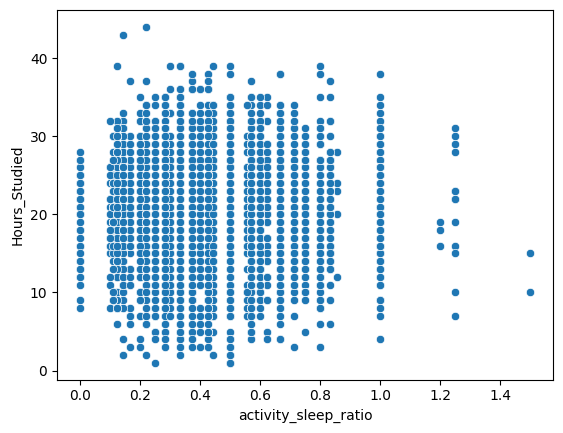

In [38]:
sns.scatterplot(x="activity_sleep_ratio", y="Hours_Studied", data=dataset1)

In [39]:
dataset1[["activity_sleep_ratio","Hours_Studied"]].corr()

,activity_sleep_ratio,Hours_Studied
activity_sleep_ratio,1.000000,-0.000292
Hours_Studied,-0.000292,1.000000


# ***Ordinal Encoding***

In [19]:
ordinal_cols = ["Parental_Involvement","Access_to_Resources","Family_Income","Teacher_Quality","Motivation_Level"]
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
#dataset1['Parental_Involvement_encoded'] = encoder.fit_transform(dataset1[['Parental_Involvement']])
for each in ordinal_cols:
  dataset1[each] = dataset1[each].astype(str)
  dataset1[each] = encoder.fit_transform(dataset1[[each]])

encoder1 = OrdinalEncoder(categories=[['High School','College','Postgraduate']])
dataset1['Parental_Education_Level'] = encoder1.fit_transform(dataset1[['Parental_Education_Level']])


encoder2 = OrdinalEncoder(categories=[['Near','Moderate','Far']])
dataset1['Distance_from_Home'] = encoder2.fit_transform(dataset1[['Distance_from_Home']])


# ***Label/Binary Encoding***

In [22]:
dataset1['Gender'] = dataset1['Gender'].map({'Male': 0, 'Female': 1})
dataset1['School_Type'] = dataset1['School_Type'].map({'Public': 0, 'Private': 1})
dataset1['Extracurricular_Activities'] = dataset1['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})
dataset1['Internet_Access'] = dataset1['Internet_Access'].map({'No': 0, 'Yes': 1})
dataset1['Peer_Influence'] = dataset1['Peer_Influence'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
dataset1['Learning_Disabilities'] = dataset1['Learning_Disabilities'].map({'No': 0, 'Yes': 1})


In [132]:
dataset1.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0,7,73,0.0,1,0,0.0,1.0,0,2,3,0,0.0,0.0,0,67
1,19,64,0.0,1.0,0,8,59,0.0,1,2,1.0,1.0,0,0,4,0,1.0,1.0,1,61
2,24,98,1.0,1.0,1,7,91,1.0,1,2,1.0,1.0,0,1,4,0,2.0,0.0,0,74
3,29,89,0.0,1.0,1,8,98,1.0,1,1,1.0,1.0,0,0,4,0,0.0,1.0,0,71
4,19,92,1.0,1.0,1,6,65,1.0,1,3,1.0,2.0,0,1,4,0,1.0,0.0,1,70


# ***Correlation HeatMap***

# ***Correlation Matrix For Columns***

In [25]:
dataset1_Corr_Columns = dataset1.drop(["Gender","School_Type","Peer_Influence","activity_sleep_ratio"], axis=1)

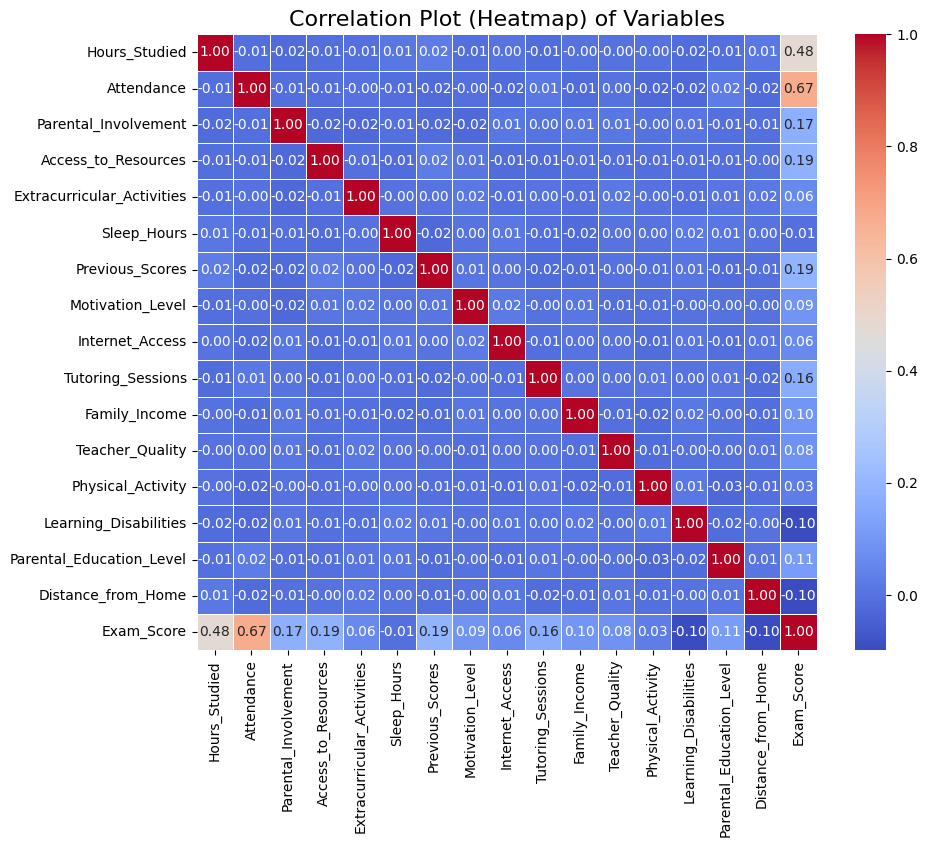

In [26]:
correlation_matrix = dataset1_Corr_Columns.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show the correlation values on the heatmap
    cmap='coolwarm',     # Use a diverging color palette
    fmt=".2f",           # Format the annotations to two decimal places
    linewidths=.5,       # Add lines to separate the cells
)

plt.title('Correlation Plot (Heatmap) of Variables', fontsize=16)
plt.show()

# ***More Data Exploration***

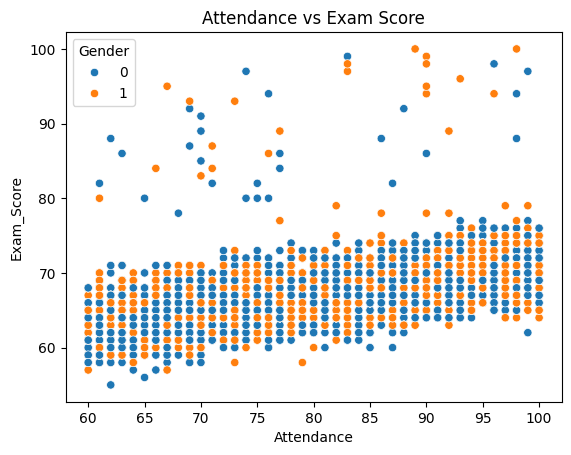

In [135]:
sns.scatterplot(data=dataset1, x='Attendance', y='Exam_Score', hue='Gender')
plt.title("Attendance vs Exam Score")
plt.show()

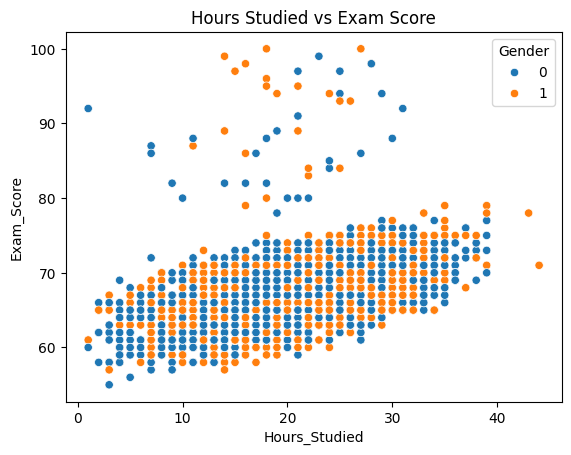

In [136]:
sns.scatterplot(data=dataset1, x='Hours_Studied', y='Exam_Score', hue='Gender')
plt.title("Hours Studied vs Exam Score")
plt.show()

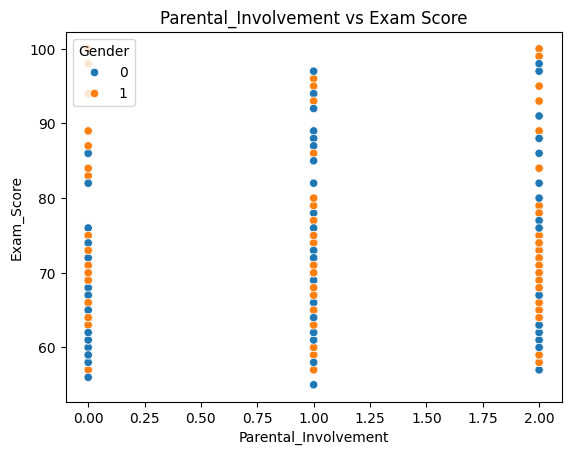

In [137]:
sns.scatterplot(data=dataset1, x='Parental_Involvement', y='Exam_Score', hue='Gender')
plt.title("Parental_Involvement vs Exam Score")
plt.show()

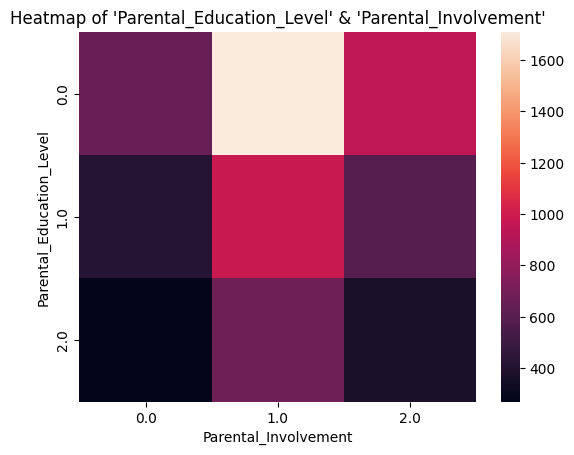

In [138]:

cross_tab=pd.crosstab(dataset1['Parental_Education_Level'],dataset1['Parental_Involvement'])
sns.heatmap(cross_tab)
plt.title("Heatmap of 'Parental_Education_Level' & 'Parental_Involvement'")
plt.show()

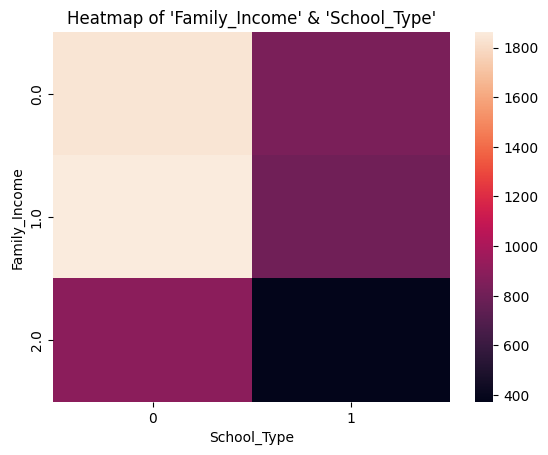

In [139]:
cross_tab=pd.crosstab(dataset1['Family_Income'],dataset1['School_Type'])
sns.heatmap(cross_tab)
plt.title("Heatmap of 'Family_Income' & 'School_Type'")
plt.show()

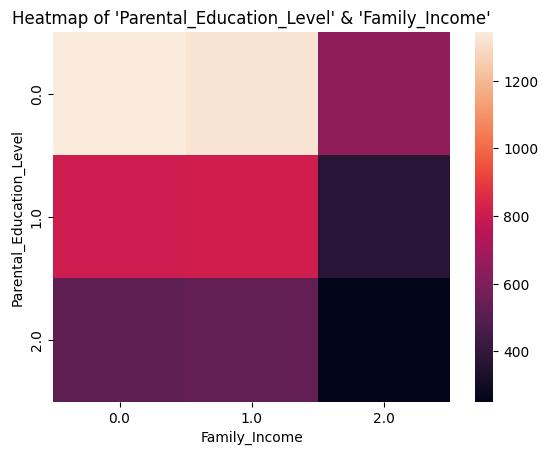

In [140]:
cross_tab=pd.crosstab(dataset1['Parental_Education_Level'],dataset1['Family_Income'])
sns.heatmap(cross_tab)
plt.title("Heatmap of 'Parental_Education_Level' & 'Family_Income'")
plt.show()

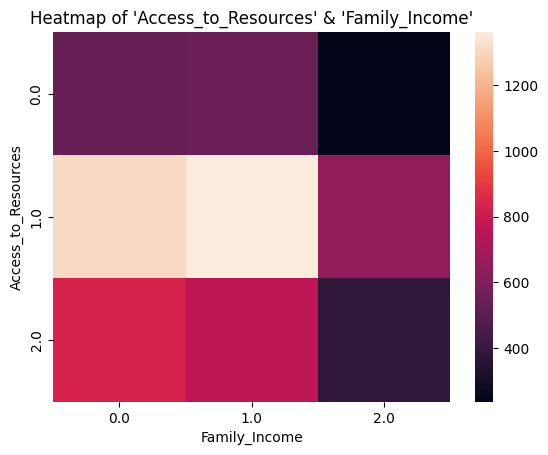

In [141]:
cross_tab=pd.crosstab(dataset1['Access_to_Resources'],dataset1['Family_Income'])
sns.heatmap(cross_tab)
plt.title("Heatmap of 'Access_to_Resources' & 'Family_Income'")
plt.show()

In [27]:
dataset1["involvement_education_ratio"] = dataset1["Parental_Involvement"] / dataset1["Parental_Education_Level"]

<Axes: xlabel='involvement_education_ratio', ylabel='Exam_Score'>

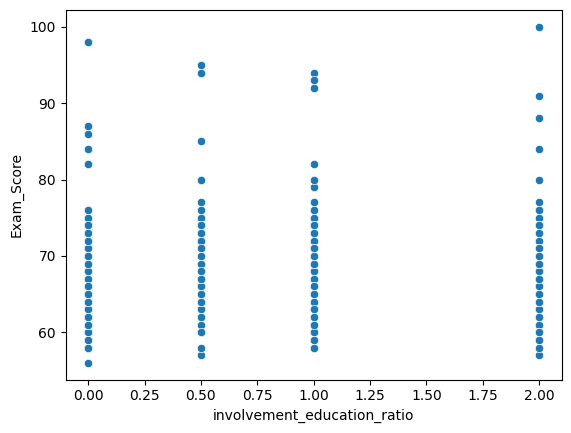

In [28]:
sns.scatterplot(x="involvement_education_ratio", y="Exam_Score", data=dataset1)

In [33]:
dataset1[["involvement_education_ratio","Exam_Score"]].corr()

,involvement_education_ratio,Exam_Score
involvement_education_ratio,1.000000,0.104539
Exam_Score,0.104539,1.000000


In [37]:
dataset1[["Parental_Education_Level","Parental_Involvement"]].corr(method="spearman")

,Parental_Education_Level,Parental_Involvement
Parental_Education_Level,1.000000,-0.005899
Parental_Involvement,-0.005899,1.000000


<Axes: xlabel='activity_sleep_ratio', ylabel='Count'>

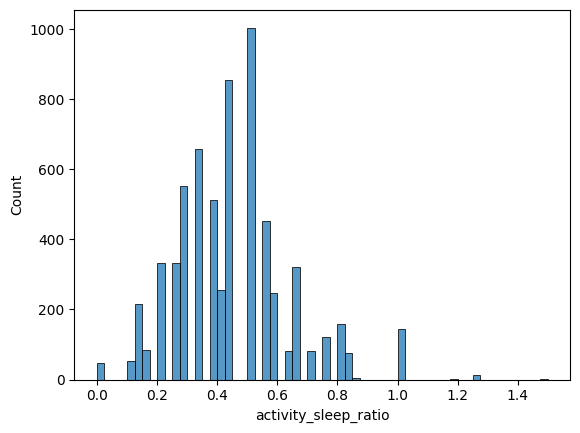

In [34]:
sns.histplot(dataset1["activity_sleep_ratio"])


<Axes: xlabel='involvement_education_ratio', ylabel='Count'>

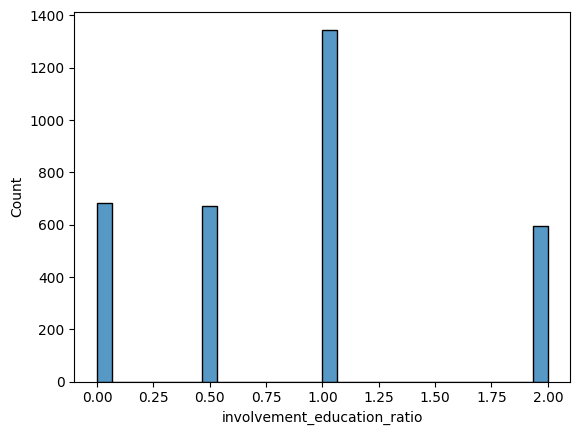

In [35]:
sns.histplot(dataset1["involvement_education_ratio"])